In [1]:
import os
import h5py
os.environ["HDF5_USE_FILE_LOCKING"]='FALSE'
import numpy as np
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import accuracy_score as acc
from matplotlib import pyplot as plt
import tensorflow as tf
from models import CEDN,CEDN_small,HED,HED_small

#load human testing data
X = np.load('data/human_testing_input.npy')
Y = np.load('data/human_testing_output.npy')

In [2]:
#load models with human weights
hed_small_model = HED_small()
hed_small_model.load_weights('Trained Models/hed_small_human.h5')
hed_model = HED()
hed_model.load_weights('Trained Models/hed_human.h5')
cedn_small_model = CEDN_small()
cedn_small_model.load_weights('Trained Models/cedn_small_human.h5')
cedn_model = CEDN()
cedn_model.load_weights('Trained Models/cedn_human.h5')

In [3]:
#make predictions
hed_small_model_pred = hed_small_model.predict(X)
hed_model_pred = hed_model.predict(X)
cedn_small_model_pred = cedn_small_model.predict(X)
cedn_model_pred = cedn_model.predict(X)

In [4]:
#calculate SSIM for inputs and predictions
#x=input SSIM, y=output SSIM, s=how many pixels are labeled ocean front (corresponding to size of dot when plotting)
x=[]
cedn_small_y=[]
cedn_small_s=[]
cedn_y=[]
cedn_s=[]
hed_y=[]
hed_s=[]
hed_small_y=[]
hed_small_s=[]
scale=150

for img in range(X.shape[0]):
    chl = X[img,:,:,0]
    sst = X[img,:,:,2]
    x.append(ssim(chl,sst))
    cedn_small_y.append(ssim(cedn_small_model_pred[img,:,:,0],cedn_small_model_pred[img,:,:,1]))
    cedn_small_s.append(np.sum(cedn_small_model_pred[img])/scale)
    cedn_y.append(ssim(cedn_model_pred[img,:,:,0],cedn_model_pred[img,:,:,1]))
    cedn_s.append(np.sum(cedn_model_pred[img])/scale)
    hed_y.append(ssim(hed_model_pred[img,:,:,0],hed_model_pred[img,:,:,1]))
    hed_s.append(np.sum(hed_model_pred[img])/scale)
    hed_small_y.append(ssim(hed_small_model_pred[img,:,:,0],hed_small_model_pred[img,:,:,1]))
    hed_small_s.append(np.sum(hed_small_model_pred[img])/scale)

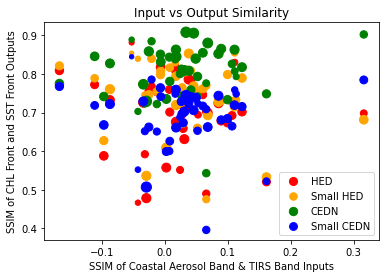

In [12]:
#plot SSIM!
plt.scatter(x,hed_y,s=hed_s,c='red',label='HED')
plt.scatter(x,hed_small_y,s=hed_small_s,c='orange',label='Small HED')
plt.scatter(x,cedn_y,s=cedn_s,c='green',label='CEDN')
plt.scatter(x,cedn_small_y,s=cedn_small_s,c='blue',label='Small CEDN')
plt.xlabel('SSIM of Coastal Aerosol Band & TIRS Band Inputs')
plt.ylabel('SSIM of CHL Front and SST Front Outputs')
plt.title('Input vs Output Similarity')
plt.legend()

In [29]:
#calculate mean output SSIM
print('CEDN Small: ', np.mean(cedn_small_y))
print('CEDN: ', np.mean(cedn_y))
print('HED Small: ', np.mean(hed_small_y))
print('HED: ', np.mean(hed_y))

CEDN Small:  0.691007034570827
CEDN:  0.8054616907390929
HED Small:  0.7413296987964328
HED:  0.701587480624443


In [20]:
def polyfit(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    #calculate r-squared
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results['r_squared'] = ssreg / sstot
    return results

In [ ]:
#calculate r squared value for lines/parabolas of best fit
print(polyfit(x,cedn_small_y,1))
print(polyfit(x,cedn_y,1))
print(polyfit(x,hed_small_y,1))
print(polyfit(x,hed_y,1))